# RNN: Implementation From Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Utils import *
from RNN import *

## Data Preprocessing

In [2]:
# 1. Prepare Data
corpus_text = """
Recurrent Neural Networks, or RNNs, are a type of artificial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, or numerical times series data.
Unlike feedforward neural networks, RNNs use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.
The term Recurrent Neural Network is used generically to refer to two broad classes of networks with a similar general structure, where one is finite impulse and the other is infinite impulse. Both classes of networks exhibit temporal dynamic behavior. A finite impulse recurrent network is a directed acyclic graph that can be unrolled and replaced with a strictly feedforward neural network, while an infinite impulse recurrent network is a directed cyclic graph that cannot be unrolled.
"""

# Prepare word-level data
X_one_hot_data, Y_data, word_to_ix, ix_to_word, vocab_size = prepare_word_data_onehot(
    corpus_text,
    vocab_threshold=1
)
if not X_one_hot_data: sys.exit("Data preparation failed.")

print(X_one_hot_data)

Preparing word data (one-hot inputs)...
Total words found: 140
Vocabulary size (threshold>=1): 85
Using entire text as one sequence.
Prepared 1 training sequence(s).
[[array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],


## Model Architecture

Starting training (One-Hot Input) for 1000 epochs...
Learning rate: 0.001, Clipping: 5
Epoch 50/1000, Loss: 2.9935, Time: 0.02s

Generated examples:
  directed a to network to a impulse of to network a
  where network is a a a is network a a is
  similar network to a impulse a of network a a to

Epoch 100/1000, Loss: 1.1793, Time: 0.02s

Generated examples:
  networks networks or a a a a of recurrent neural network
  replaced neural networks or speech are a type of recurrent neural
  unrolled is networks or a graph that a be impulse a

Epoch 150/1000, Loss: 0.4655, Time: 0.02s

Generated examples:
  classes neural networks or rnns are a type of networks neural
  network is networks directed a graph that can be unrolled and
  neural networks or rnns are a type of artificial neural network

Epoch 200/1000, Loss: 0.2472, Time: 0.02s

Generated examples:
  other is networks networks a a a a neural impulse and
  memory neural networks or rnns are a type of artificial neural
  rnns networks 

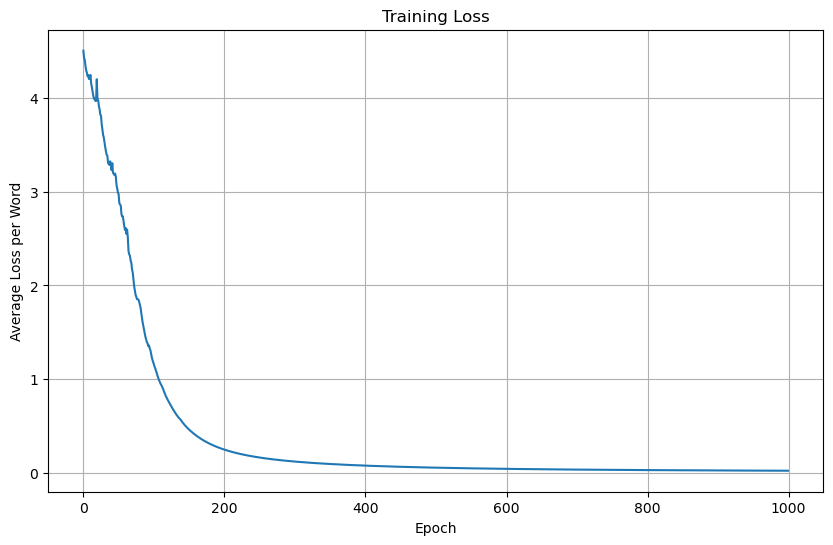


--- Sampling from the trained model ---

Sampling (random choice) starting with 'neural':
neural or rnns of behavior a type of networks neural network

Sampling (argmax choice) starting with 'neural':
neural networks or rnns are a type of artificial neural network


In [3]:
# 2. Define Model Hyperparameters
hidden_dim = 100
learning_rate = 0.001
epochs = 1000
clip_value = 5
print_every = 50

# 3. Instantiate Model
rnn_model = RNN(hidden_dim=hidden_dim, vocab_size=vocab_size)

# Set word mappings
rnn_model.word_to_ix = word_to_ix
rnn_model.ix_to_word = ix_to_word

# 4. Train Model (No data_generator needed anymore)
loss_history = rnn_model.train(
    X_one_hot_data, 
    Y_data,
    lr=learning_rate,
    epochs=epochs,
    clip_value=clip_value,
    print_every=print_every,
    generated_examples=3  # Show 3 examples per reporting interval
)

# 5. Plot Loss (Unchanged)
if loss_history:
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("Average Loss per Word")
    plt.title("Training Loss")
    plt.grid(True)
    plt.show()

# 6. Evaluate by Sampling (Using the word-specific predict method)
print("\n--- Sampling from the trained model ---")
seed_word = "neural"
sample_length = 10

print(f"\nSampling (random choice) starting with '{seed_word}':")
sampled_text_random = rnn_model.predict_words(seed_word, n=sample_length, sample_strategy='random')
print(f"{sampled_text_random}")

print(f"\nSampling (argmax choice) starting with '{seed_word}':")
sampled_text_argmax = rnn_model.predict_words(seed_word, n=sample_length, sample_strategy='argmax')
print(f"{sampled_text_argmax}")